In [202]:
import gpxpy
import gpxpy.gpx

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [203]:
def deg_min_2_deg(degs,mins):
    dec_mins = mins / 60 
    return degs + dec_mins

deg_min_2_deg(59,30.1)
    

59.501666666666665

In [204]:


# Parsing an existing file:
# -------------------------

#true_lat = 59.3937434 #home
#true_lon = 18.4013184 #home

## fyren ##
lat_deg = 59
lat_min = 23.948
lon_deg = 18
lon_min = 26.238

true_lat = deg_min_2_deg(lat_deg,lat_min)
true_lon = deg_min_2_deg(lon_deg,lon_min)

#filename = 'stationary.gpx' ## home
filename = 'fyren.gpx'

gpx_file = open(filename, 'r')

gpx = gpxpy.parse(gpx_file)


lats = []
lons = []
elevs = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            lats.append(point.latitude)
            lons.append(point.longitude)
            elevs.append(point.elevation)
            

df = pd.DataFrame({'lat':lats,
                  'lon' : lons,
                  'ele' : elevs})


'''            
for waypoint in gpx.waypoints:
    print('waypoint {0} -> ({1},{2})'.format(waypoint.name, waypoint.latitude, waypoint.longitude))

for route in gpx.routes:
    print('Route:')
    for point in route.points:
        print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))


'''

df.describe()

,lat,lon,ele
count,1533.000000,1533.000000,1533.000000
mean,59.399122,18.437352,3.751533
std,0.000009,0.000028,0.607873
min,59.399105,18.437282,-1.100000
25%,59.399117,18.437325,3.500000
50%,59.399122,18.437348,3.800000
75%,59.399128,18.437367,3.900000
max,59.399150,18.437405,6.100000


In [205]:
filename.split('.')

['fyren', 'gpx']

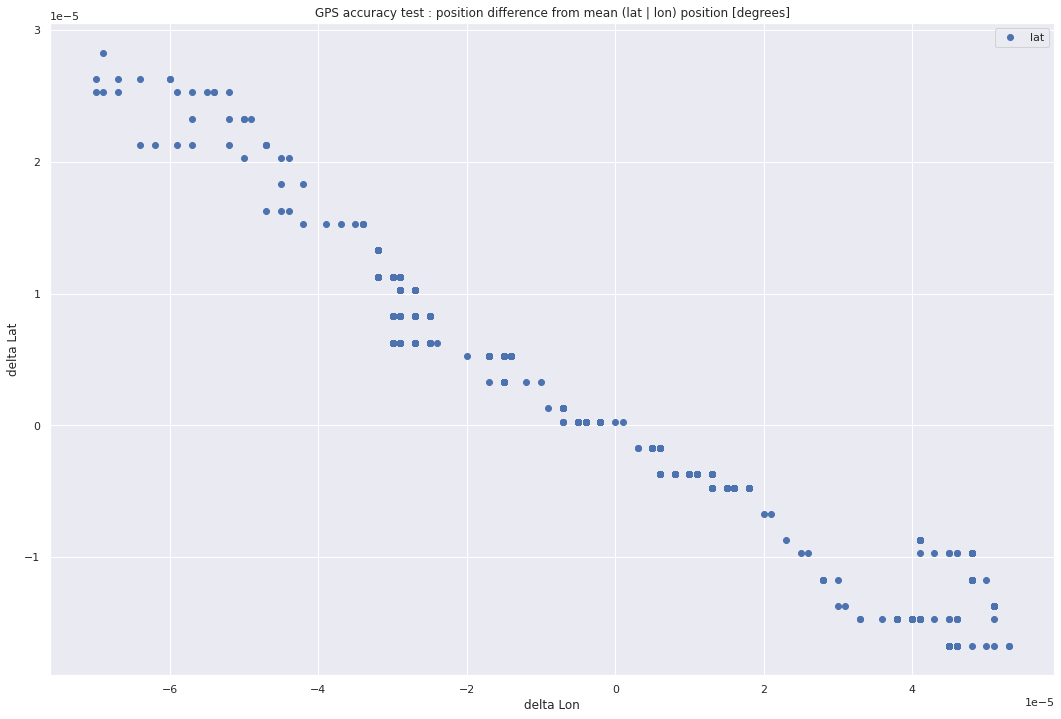

In [206]:
def center(x):
    return x - x.mean()

centered_df = df.apply(center)

title = 'GPS accuracy test : position difference from mean (lat | lon) position [degrees]'
centered_df.plot(x='lon',y='lat',figsize=(18,12),style='o',title=title)
plt.ylabel('delta Lat')
plt.xlabel('delta Lon')

plt.savefig('gps_accuracy_pos_diff_from_mean_{}.jpg'.format(filename.split('.')[0]),format='jpg')

In [207]:
60 * 1852 * 5e-5

5.556

In [208]:
def distance(lat1,long1,lat2,long2):
 R = 6371.
 lat1 = np.radians(lat1)
 long1 = np.radians(long1)
 lat2 = np.radians(lat2)
 long2 = np.radians(long2)
 dlat = lat2-lat1
 dlong = long2 - long1

 a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(
 lat1) * np.cos(lat2) * np.sin(dlong/2) * np.sin(dlong/2)

 c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))

 d = R * c / 1.852 # NM
 return d

In [209]:
distance(0,0,90,0)


5403.641143634063

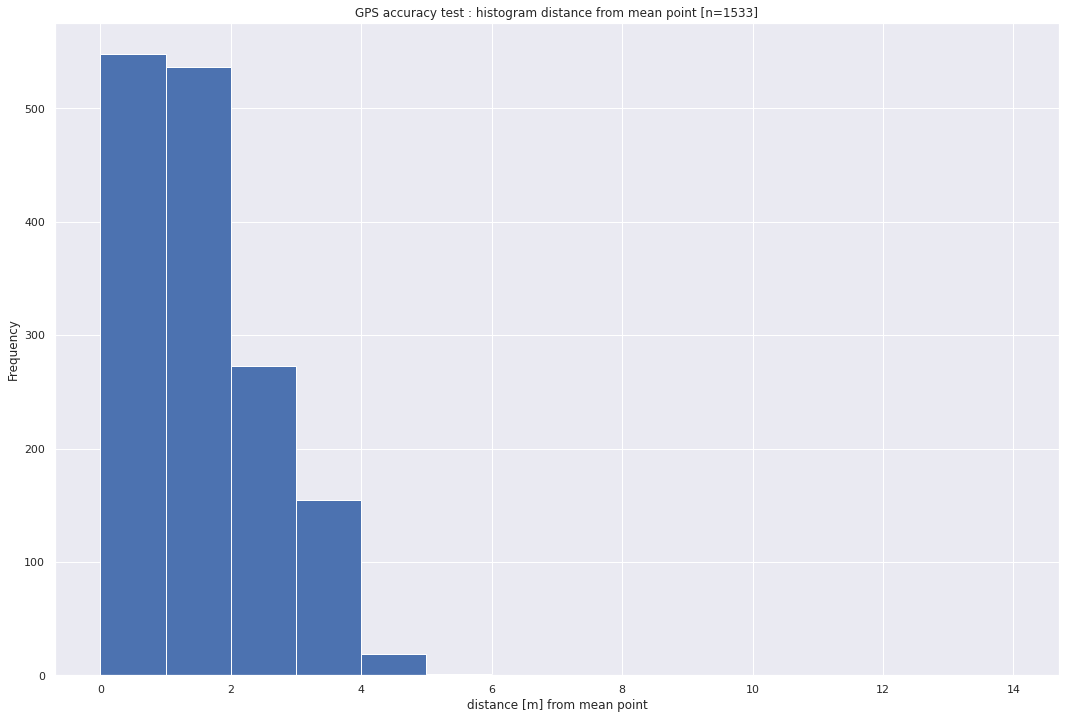

In [210]:
title = 'GPS accuracy test : histogram distance from mean point [n={}]'.format(len(df))
mean_lat = df.lat.mean()
mean_lon = df.lon.mean()

dist_from_mean = df.apply(
    lambda row : distance(mean_lat,mean_lon,row.lat,row.lon) * 1.852 * 1000,axis=1) # distance in m

dist_from_mean.plot(kind='hist',bins=range(15),figsize=(18,12),title=title)
plt.xlabel('distance [m] from mean point')
plt.savefig('gps_accuracy_distance_freq_{}.jpg'.format(filename.split('.')[0]),format='jpg')

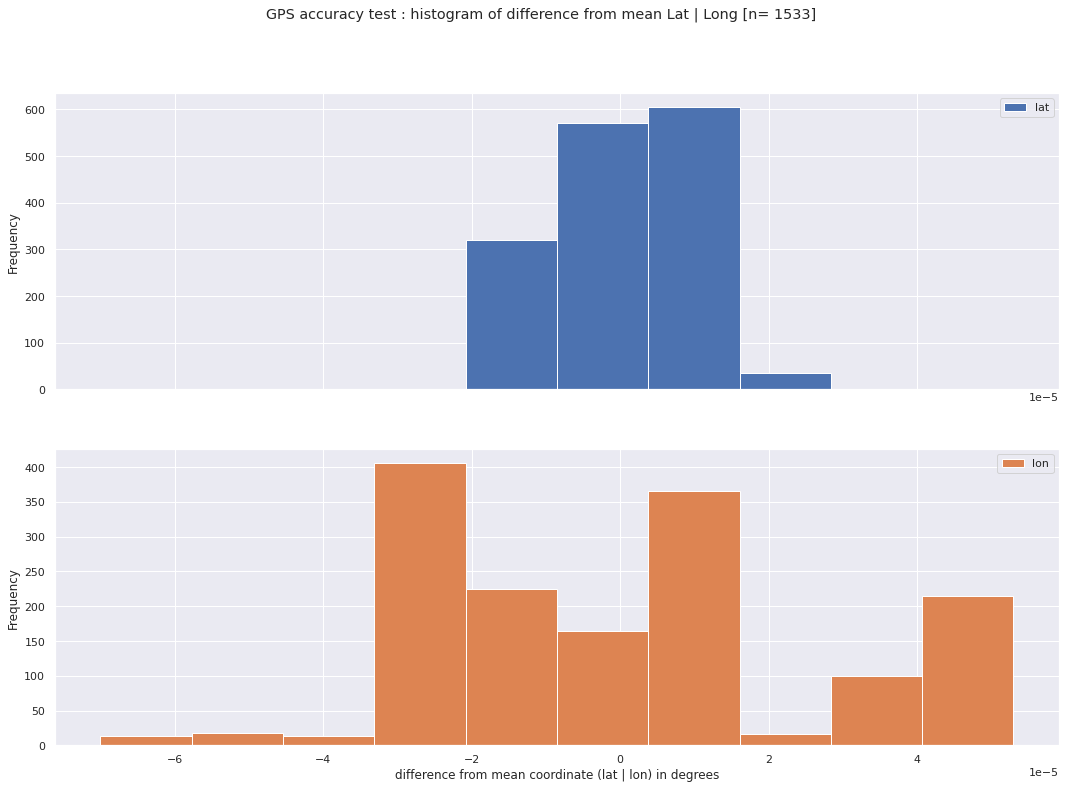

In [211]:
title = 'GPS accuracy test : histogram of difference from mean Lat | Long [n= {}]'.format(len(df))
centered_df.plot(figsize=(18,12),subplots=True,kind='hist',title=title,y=['lat','lon'])
plt.xlabel('difference from mean coordinate (lat | lon) in degrees')
plt.savefig('gps_accuracy_diff_mean_coords_{}.jpg'.format(filename.split('.')[0]),format='jpg')


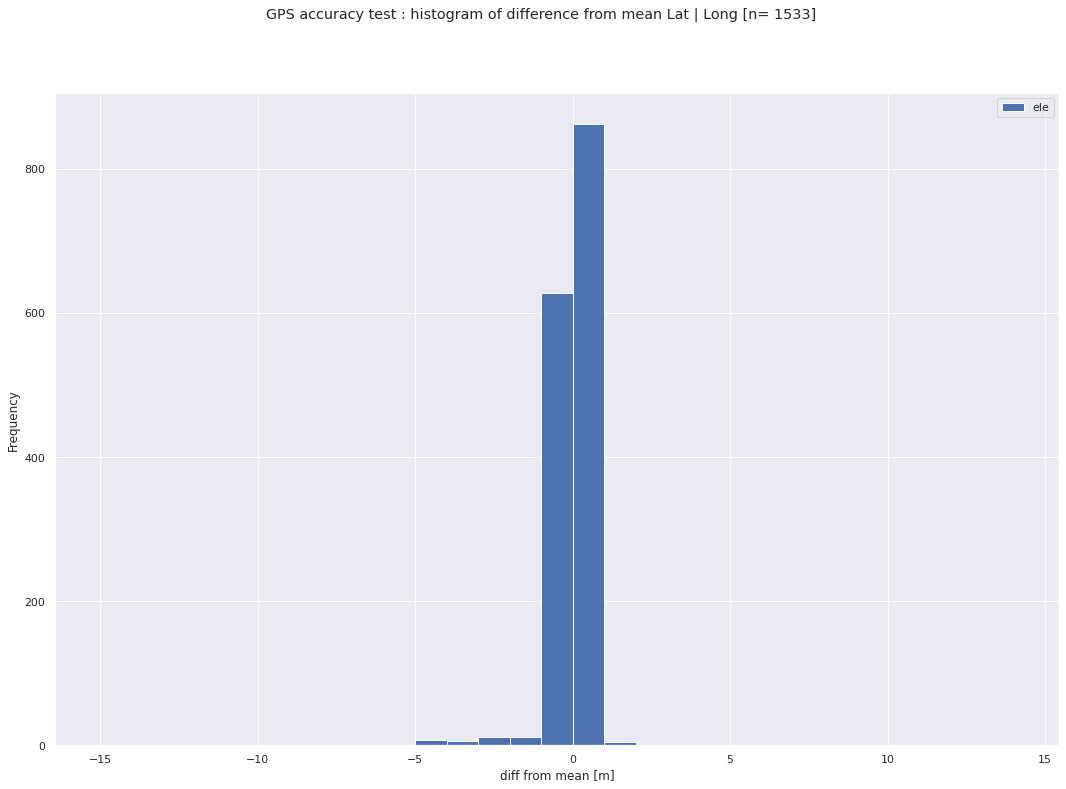

In [212]:
centered_df.plot(figsize=(18,12),subplots=True,kind='hist',title=title,y=['ele'],bins=range(-15,15))
plt.xlabel('diff from mean [m]')
plt.savefig('gps_accuracy_elevation_dist_{}.jpg'.format(filename.split('.')[0]),format='jpg')


,x,y
count,1000.000000,1000.000000
mean,0.025266,0.018070
std,1.023380,1.005656
min,-3.447816,-2.917847
25%,-0.714658,-0.635243
50%,0.001048,0.003010
75%,0.731281,0.719648
max,2.951882,3.309079


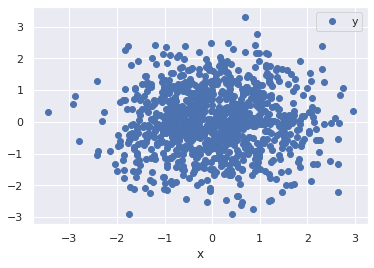

In [213]:
test_df = pd.DataFrame({'x' : np.random.normal(0,1,1000),
                       'y' : np.random.normal(0,1,1000)})

x_mean = test_df.x.mean()
y_mean = test_df.y.mean()

test_df.plot(x='x',y='y',style='o')

test_df.describe()

In [214]:
def test_dist(x,y):
    return np.sqrt(x**2 + y**2)

test_dist_series = test_df.apply(lambda row : test_dist(row.x,row.y),axis=1)
test_dist_series

0      1.538176
1      1.278797
2      2.355836
3      0.777305
4      1.420691
         ...   
995    1.099566
996    2.306710
997    2.580666
998    0.061399
999    2.244723
Length: 1000, dtype: float64

<AxesSubplot:>

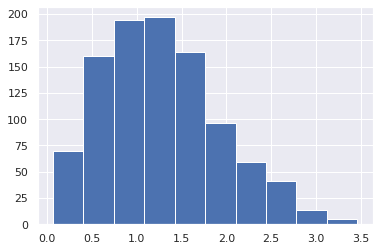

In [215]:
test_dist_series.hist()

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

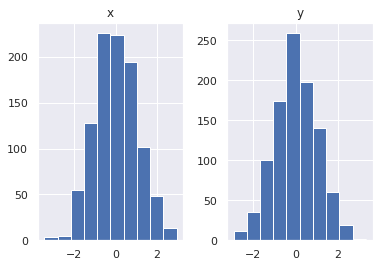

In [216]:
test_df.hist()

In [217]:
1852 * 60 

111120

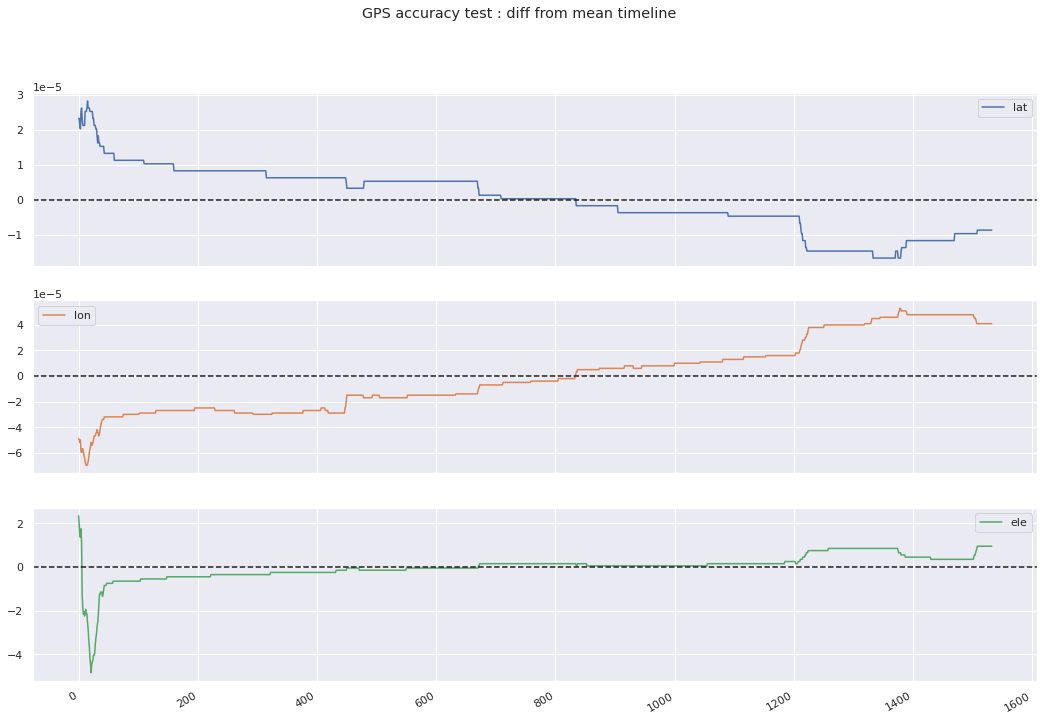

In [218]:
title = 'GPS accuracy test : diff from mean timeline'
axes = centered_df.plot(subplots=True,figsize=(18,12),title=title)

for a in axes:
    a.axhline(0,ls='dashed',color='k')
    
plt.savefig('gps_accuracy_drift_timeline_{}.jpg'.format(filename.split('.')[0]),format='jpg')

In [219]:
four_m_diff = 4 / 111120
four_m_diff

3.599712023038157e-05

In [220]:
((centered_df['lat'] < -four_m_diff) | (centered_df['lat'] > four_m_diff)).sum()

0

In [221]:

avg_lat = df['lat'].mean()
avg_lon = df['lon'].mean()

print (avg_lat - true_lat)
print (avg_lon - true_lon)

distance(true_lat,true_lon,avg_lat,avg_lon) * 1.852 * 1000 #meters


-1.1627527719326736e-05
5.20143509419313e-05


3.2156129571366465

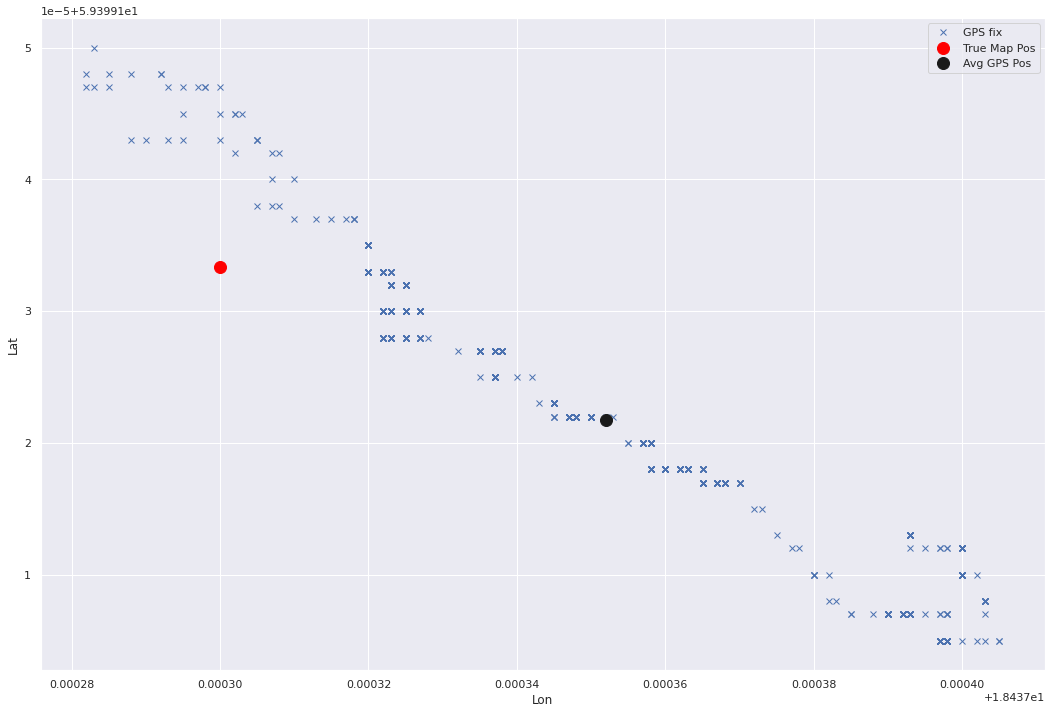

In [222]:
ax = df.plot(x='lon',y='lat',figsize=(18,12),style='x',label='GPS fix')
ax.plot(true_lon,true_lat,'o',color='red',ms=12,label='True Map Pos')
ax.plot(avg_lon,avg_lat,'o',color='k',ms=12,label='Avg GPS Pos')
plt.legend(loc='upper right')
plt.ylabel('Lat')
plt.xlabel('Lon')
plt.savefig ('gps_accuracy_true_and_avg_pos_{}.jpg'.format(filename.split('.')[0]),format='jpg')


In [223]:
def true_center(lat,lon):
    return lat - true_lat, lon - true_lon
    
centered_w_true_pos = pd.DataFrame.from_records(df.apply(lambda row : true_center(row.lat,row.lon),axis=1),
                                               columns=['delta_lat','delta_lon'])

centered_w_true_pos


,delta_lat,delta_lon
0,0.000012,0.000003
1,0.000012,0.000002
2,0.000010,0.000000
3,0.000009,0.000002
4,0.000014,-0.000007
...,...,...
1528,-0.000020,0.000093
1529,-0.000020,0.000093
1530,-0.000020,0.000093
1531,-0.000020,0.000093


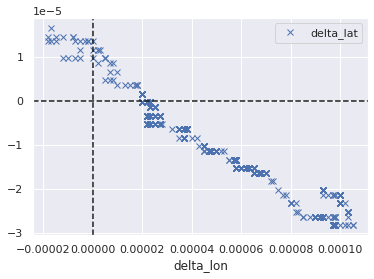

In [224]:
ax = centered_w_true_pos.plot(style='x',x='delta_lon',y='delta_lat')
ax.axhline(0,color='k',ls='dashed')
ax.axvline(0,color='k',ls='dashed')

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

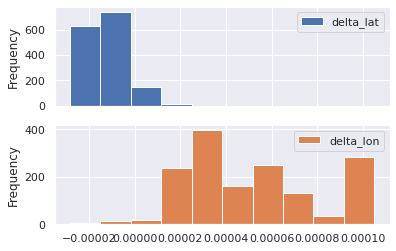

In [225]:
centered_w_true_pos.plot(kind='hist',subplots=True)

<AxesSubplot:>

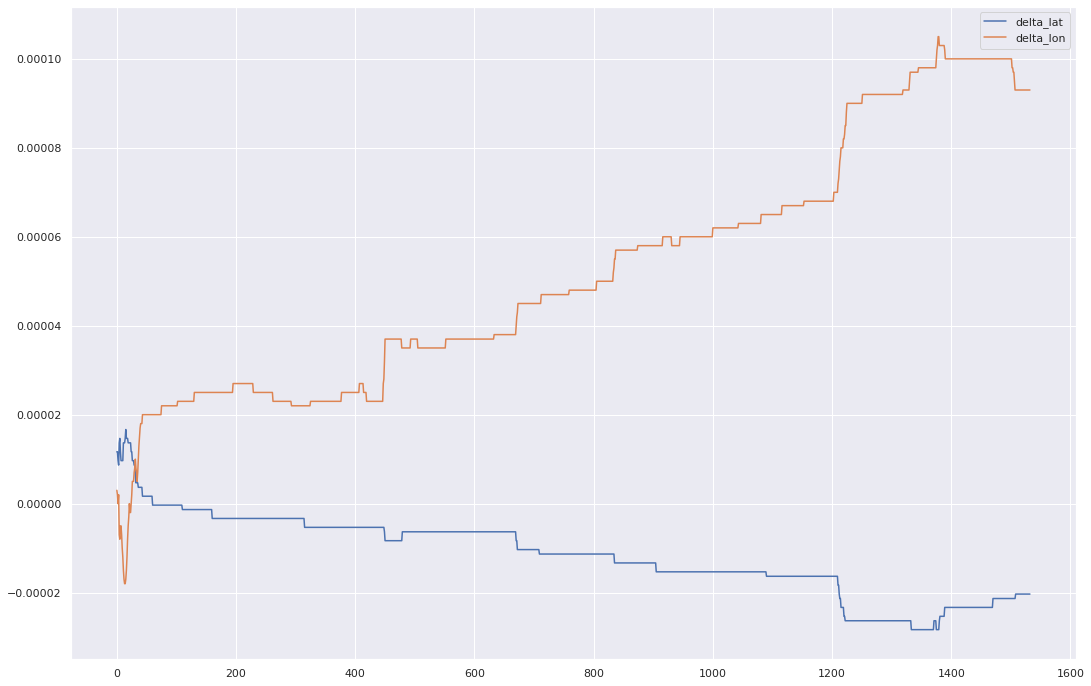

In [227]:
centered_w_true_pos.plot(figsize=(18,12))